**Day 2 -- Python for Researchers**

Today's Goals:
   * Learn how to open and read .txt files
   * Explore Python libraries, how to use them, and how to read documentation
   * Learn the basics of data cleaning for text files
   * Introduce some options for visualizing data through a matplotlib wordcloud

**Finding and opening .txt files**

The best way to work with various files while programming is to ensure that file is in your *working directory*. Your working directory
is just another way to say the folder you are currently coding in. VSCode always pushes you to be coding inside a folder. 

You have a file named *ascii-text-art.txt* that is located in your working directory, below is the code you need to 
 open the file and read it using Python!

 You will need the path name for your file, right click the file and you have two options, both should work:
   * copy path (full file path)
   * copy relative path (relative, or shortened, file path)

Below we are using three functions:
   * open() -- built-in Python function, opens a file
   * read() -- built-in Python function, reads a file
   * print() -- built-in Python function, prints below the cell for user convenience 



In [ ]:
#ASCII File

#r stands for "read"
path = r"YOUR PATH HERE"

with open(path, "r", encoding="utf-8") as f:
    content = f.read()
    print(content)

 ____        _   _                   _____                
|  _ \ _   _| |_| |__   ___  _ __   |  ___|__  _ __       
| |_) | | | | __| '_ \ / _ \| '_ \  | |_ / _ \| '__|      
|  __/| |_| | |_| | | | (_) | | | | |  _| (_) | |         
|_|__  \__, |\__|_| |_|\___/|_| |_| |_|  \___/|_|       _ 
|  _ \ |___/___  ___  __ _ _ __ ___| |__   ___ _ __ ___| |
| |_) / _ \/ __|/ _ \/ _` | '__/ __| '_ \ / _ \ '__/ __| |
|  _ <  __/\__ \  __/ (_| | | | (__| | | |  __/ |  \__ \_|
|_| \_\___||___/\___|\__,_|_|  \___|_| |_|\___|_|  |___(_)


If you are ever unsure where exactly you are coding, you can use the os module getcwd() function to show you!
gwc means "get current working directory" -- https://www.w3schools.com/python/ref_os_getcwd.asp

It returns the file path of wherever you are coding.

In [ ]:
import os
os.getcwd()

'c:\\Users\\Chelsea\\Dropbox\\PC\\Documents\\GitHub\\Graduate-Crash-Course'

**Doing some basic text cleaning**

We're now going to practice some basic text cleaning using a new .txt file. For this one, you need to download it yourself
and add it to your working directory. You can find the file here: https://drive.google.com/file/d/1Xoenw8hs84nBpkcETqJOC_MBkopEjamS/view?usp=sharing

First, you need to open the file, and then we'll get started:

In [1]:
path = r"bush_2000_sotu.txt"

with open(path, "r", encoding="utf-8") as f:
    bush_file = f.read()

We are going to be looking at the State of the Union (SOTU) address by Pres. George W. Bush from 2001. We've got one basic research question: 
*what are the most commonly referenced topics in Pres. Bush's SOTU address?*

In order for us to begin to answer that question, we have to clean our dataset.

The most common thing we need to do is remove *stopwords*. These are words that are so commonly used that they are totally irrelevant for 
textual analysis and waste processing time to evaluate. You can create your own custom list of stopwords, aka words that you want to ignore in your dataset, but
most Python libraries for text analysis also include a pre-set list of stopwords.  

In [2]:
import nltk
from nltk.corpus import stopwords 
stops = stopwords.words("english")

stops

c:\Users\Chelsea\anaconda3_\lib\site-packages\scipy\__init__.py:155: UserWarning: A NumPy version >=1.18.5 and <1.25.0 is required for this version of SciPy (detected version 1.26.4
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


['i',
 'me',
 'my',
 'myself',
 'we',
 'our',
 'ours',
 'ourselves',
 'you',
 "you're",
 "you've",
 "you'll",
 "you'd",
 'your',
 'yours',
 'yourself',
 'yourselves',
 'he',
 'him',
 'his',
 'himself',
 'she',
 "she's",
 'her',
 'hers',
 'herself',
 'it',
 "it's",
 'its',
 'itself',
 'they',
 'them',
 'their',
 'theirs',
 'themselves',
 'what',
 'which',
 'who',
 'whom',
 'this',
 'that',
 "that'll",
 'these',
 'those',
 'am',
 'is',
 'are',
 'was',
 'were',
 'be',
 'been',
 'being',
 'have',
 'has',
 'had',
 'having',
 'do',
 'does',
 'did',
 'doing',
 'a',
 'an',
 'the',
 'and',
 'but',
 'if',
 'or',
 'because',
 'as',
 'until',
 'while',
 'of',
 'at',
 'by',
 'for',
 'with',
 'about',
 'against',
 'between',
 'into',
 'through',
 'during',
 'before',
 'after',
 'above',
 'below',
 'to',
 'from',
 'up',
 'down',
 'in',
 'out',
 'on',
 'off',
 'over',
 'under',
 'again',
 'further',
 'then',
 'once',
 'here',
 'there',
 'when',
 'where',
 'why',
 'how',
 'all',
 'any',
 'both',
 'each

In [3]:
#adapted code from https://www.geeksforgeeks.org/removing-stop-words-nltk-python/

from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
 
stop_words = set(stopwords.words('english'))
 
word_tokens = word_tokenize(bush_file)
cleaned_speech = []
 
for w in word_tokens:
    if w.lower() not in stop_words and w.isalpha():
        cleaned_speech.append(w)
 
print(word_tokens)
print(cleaned_speech)

['9:15', 'P.M.', 'EST', 'THE', 'PRESIDENT', ':', 'Thank', 'you', 'very', 'much', '.', 'Mr.', 'Speaker', ',', 'Vice', 'President', 'Cheney', ',', 'members', 'of', 'Congress', ',', 'distinguished', 'guests', ',', 'fellow', 'citizens', ':', 'As', 'we', 'gather', 'tonight', ',', 'our', 'nation', 'is', 'at', 'war', ',', 'our', 'economy', 'is', 'in', 'recession', ',', 'and', 'the', 'civilized', 'world', 'faces', 'unprecedented', 'dangers', '.', 'Yet', 'the', 'state', 'of', 'our', 'Union', 'has', 'never', 'been', 'stronger', '.', '(', 'Applause', '.', ')', 'President', 'George', 'W.', 'Bush', 'delivers', 'the', 'State', 'of', 'the', 'Union', 'address', 'before', 'a', 'joint', 'session', 'of', 'congress', 'at', 'the', 'Capitol', ',', 'Tuesday', ',', 'Jan', '29', ',', '2002.We', 'last', 'met', 'in', 'an', 'hour', 'of', 'shock', 'and', 'suffering', '.', 'In', 'four', 'short', 'months', ',', 'our', 'nation', 'has', 'comforted', 'the', 'victims', ',', 'begun', 'to', 'rebuild', 'New', 'York', 'and'

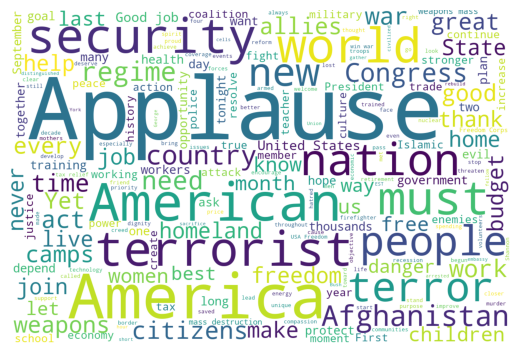

In [9]:
from wordcloud import WordCloud
from matplotlib import pyplot as plt
# !pip uninstall pillow -y
# !pip install pillow==9.5.0

text_to_plot = " ".join(cleaned_speech)

# create a WordCloud 
wordcloud = WordCloud(width=1200, height=800, 
                      background_color="white").generate(text_to_plot)

# plot the WordCloud image
plt.figure(figsize = (5,5), facecolor = None)
plt.imshow(wordcloud)
plt.axis("off")
plt.tight_layout(pad = 0)

plt.show()

Wordcloud documentation: https://amueller.github.io/word_cloud/